In [5]:
!git clone https://github.com/lilaorlova/HomeWork3_ML.git

Cloning into 'HomeWork3_ML'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 7.57 KiB | 7.57 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [6]:
%cd HomeWork3_ML

/content/HomeWork3_ML/HomeWork3_ML


In [7]:
import Dataloader

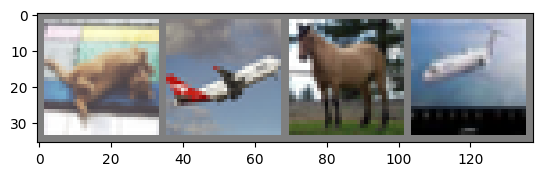

cat   plane horse plane


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from Dataloader import trainloader, batch_size, classes
import torchvision
import torch
import torchvision
import torchvision.transforms as transforms

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
import Model

In [10]:
import Training

[1,  2000] loss: 2.189
[1,  4000] loss: 1.829
[1,  6000] loss: 1.653
[1,  8000] loss: 1.591
[1, 10000] loss: 1.544
[1, 12000] loss: 1.496
[2,  2000] loss: 1.426
[2,  4000] loss: 1.395
[2,  6000] loss: 1.375
[2,  8000] loss: 1.352
[2, 10000] loss: 1.323
[2, 12000] loss: 1.307
Finished Training


In [13]:
from Training import net

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

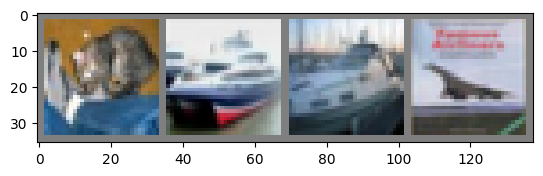

GroundTruth:  cat   ship  ship  plane


In [15]:
from Dataloader import testloader

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [17]:
from Model import Net

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   ship 


In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [21]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.5 %
Accuracy for class: car   is 67.4 %
Accuracy for class: bird  is 44.8 %
Accuracy for class: cat   is 31.2 %
Accuracy for class: deer  is 47.8 %
Accuracy for class: dog   is 44.5 %
Accuracy for class: frog  is 69.3 %
Accuracy for class: horse is 65.4 %
Accuracy for class: ship  is 66.1 %
Accuracy for class: truck is 64.0 %


In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [23]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
inputs, labels = data[0].to(device), data[1].to(device)